# Dataset

### Credit Card Fraud Detection


https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# Load Packages


In [301]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


import gc
from datetime import datetime 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from sklearn import svm
#import lightgbm as lgb
#from lightgbm import LGBMClassifier
#import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

## Read the Data


In [134]:
df=pd.read_csv('C:/Anaconda3/fraud_detection/creditcard.csv')

In [135]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Check the Data


In [138]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [140]:
df.duplicated().sum()

1081

In [142]:
df[df.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [143]:
df.drop_duplicates(inplace=True,keep='first')

In [145]:
df.duplicated().sum()

0

## Check Missing Data


In [149]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Check Data Unbalance


C:\Users\Moustafa Abdel-sttar\AppData\Local\Temp\ipykernel_13760\2548752336.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




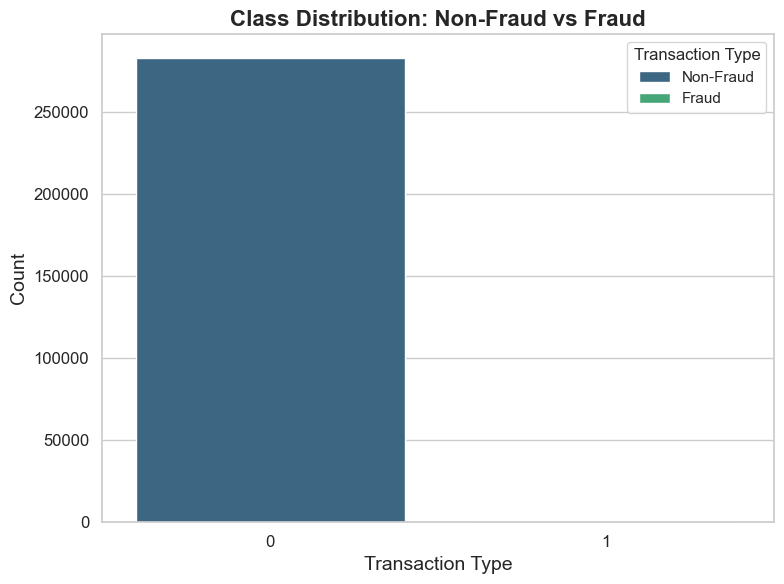

In [155]:

# Creating a barplot using the viridis palette for the 'Class' column
plt.figure(figsize=(8, 6))

# Using seaborn countplot to visualize the class distribution with the viridis palette
sns.countplot(x='Class', data=df, palette='viridis')

# Adding plot details for neatness
plt.title('Class Distribution: Non-Fraud vs Fraud', fontsize=16, weight='bold')
plt.xlabel('Transaction Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(['Non-Fraud', 'Fraud'], title='Transaction Type')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

#### We definetly need to treat the imbalance here

# Data Exploration


#### Time & Amout Distributions

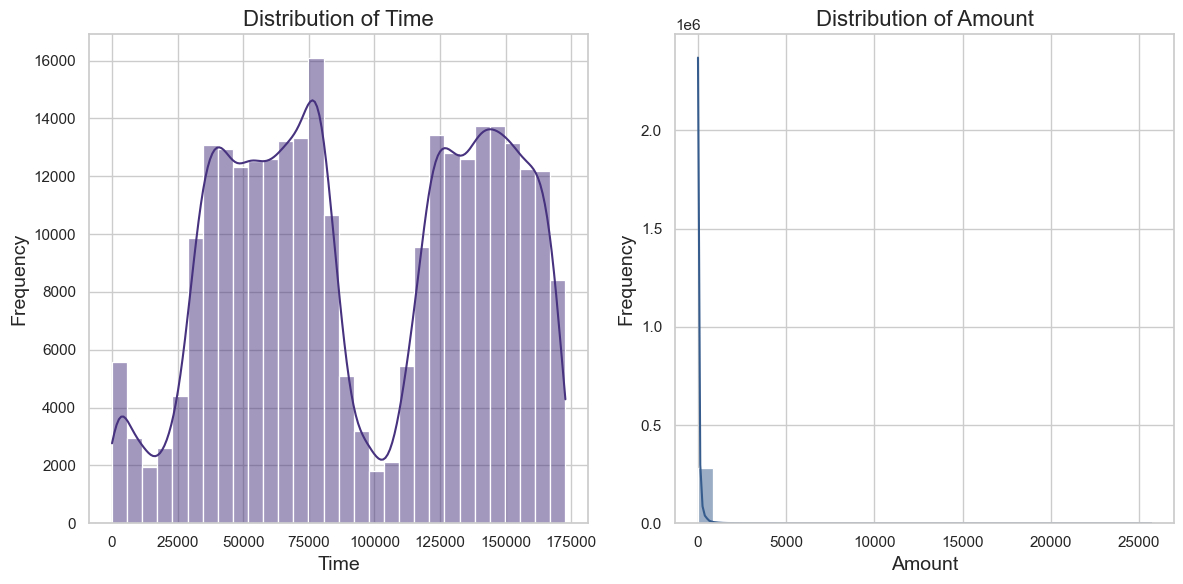

In [160]:
plt.figure(figsize=(12, 6))

# Plotting the distribution of 'Time' using Viridis colormap
plt.subplot(1, 2, 1)
sns.histplot(df['Time'], kde=True, color=sns.color_palette("viridis")[0], bins=30)
plt.title('Distribution of Time', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Plotting the distribution of 'Amount' using Viridis colormap
plt.subplot(1, 2, 2)
sns.histplot(df['Amount'], kde=True, color=sns.color_palette("viridis")[1], bins=30)
plt.title('Distribution of Amount', fontsize=16)
plt.xlabel('Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

#### we definetly need to scale this data with the other v's features

##### Using RobustScaler becaue the data is higly skewed



In [164]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [166]:
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [168]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.959811,-0.995279
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.411487,-0.995279
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.667362,-0.995267


In [170]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [183]:
# Create a test dfs for data manipultion purposes
# shuffle the data
df = df.sample(frac=1)
fraud_df=df.loc[df['Class']==1]
non_fraud_df=df.loc[df['Class']==0][:473]

In [218]:
under_df=pd.concat([fraud_df,non_fraud_df]).sample(frac=1,random_state=0)
under_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
182847,-1.475209,1.640716,1.598924,2.782740,1.238322,0.504955,-2.117083,-3.740199,-0.532484,0.834270,...,-1.521867,-2.008908,0.020992,1.619989,0.277323,0.257239,0.216983,0,-0.305938,0.480397
61592,-2.275948,-0.847022,2.802007,2.879286,-0.847597,1.191895,-0.417070,0.713635,0.618175,-0.026437,...,1.213964,1.136419,0.469723,0.335636,0.248981,0.207401,-0.356956,0,1.989431,-0.408828
64772,0.074667,0.688371,0.892371,0.681022,0.606398,0.504922,0.879455,-0.265681,-0.139812,0.702098,...,1.036768,0.037924,-0.291704,-1.215677,-0.503185,-0.337080,-0.301233,0,0.111528,-0.392446
6427,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,-4.624985,...,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1,-0.292032,-0.905859
108258,0.196707,1.189757,0.704882,2.891388,0.045555,1.245730,-1.198714,-2.421616,-1.232089,0.324239,...,0.189311,-0.005524,-0.814708,0.400924,0.286281,0.135215,0.257315,1,-0.295369,-0.162933


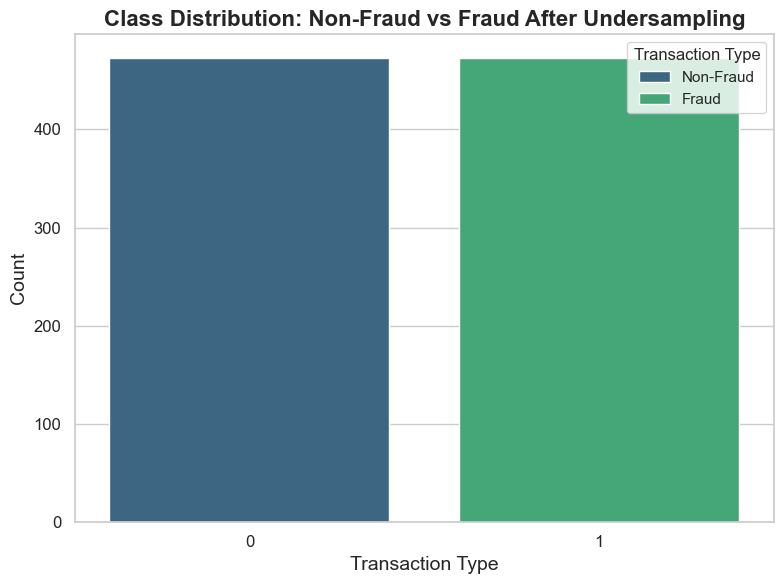

In [220]:
# Creating a barplot using the viridis palette for the 'Class' column
plt.figure(figsize=(8, 6))

# Using seaborn countplot to visualize the class distribution with the viridis palette
sns.countplot(x='Class', data=under_df, palette='viridis')

# Adding plot details for neatness
plt.title('Class Distribution: Non-Fraud vs Fraud After Undersampling', fontsize=16, weight='bold')
plt.xlabel('Transaction Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(['Non-Fraud', 'Fraud'], title='Transaction Type')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

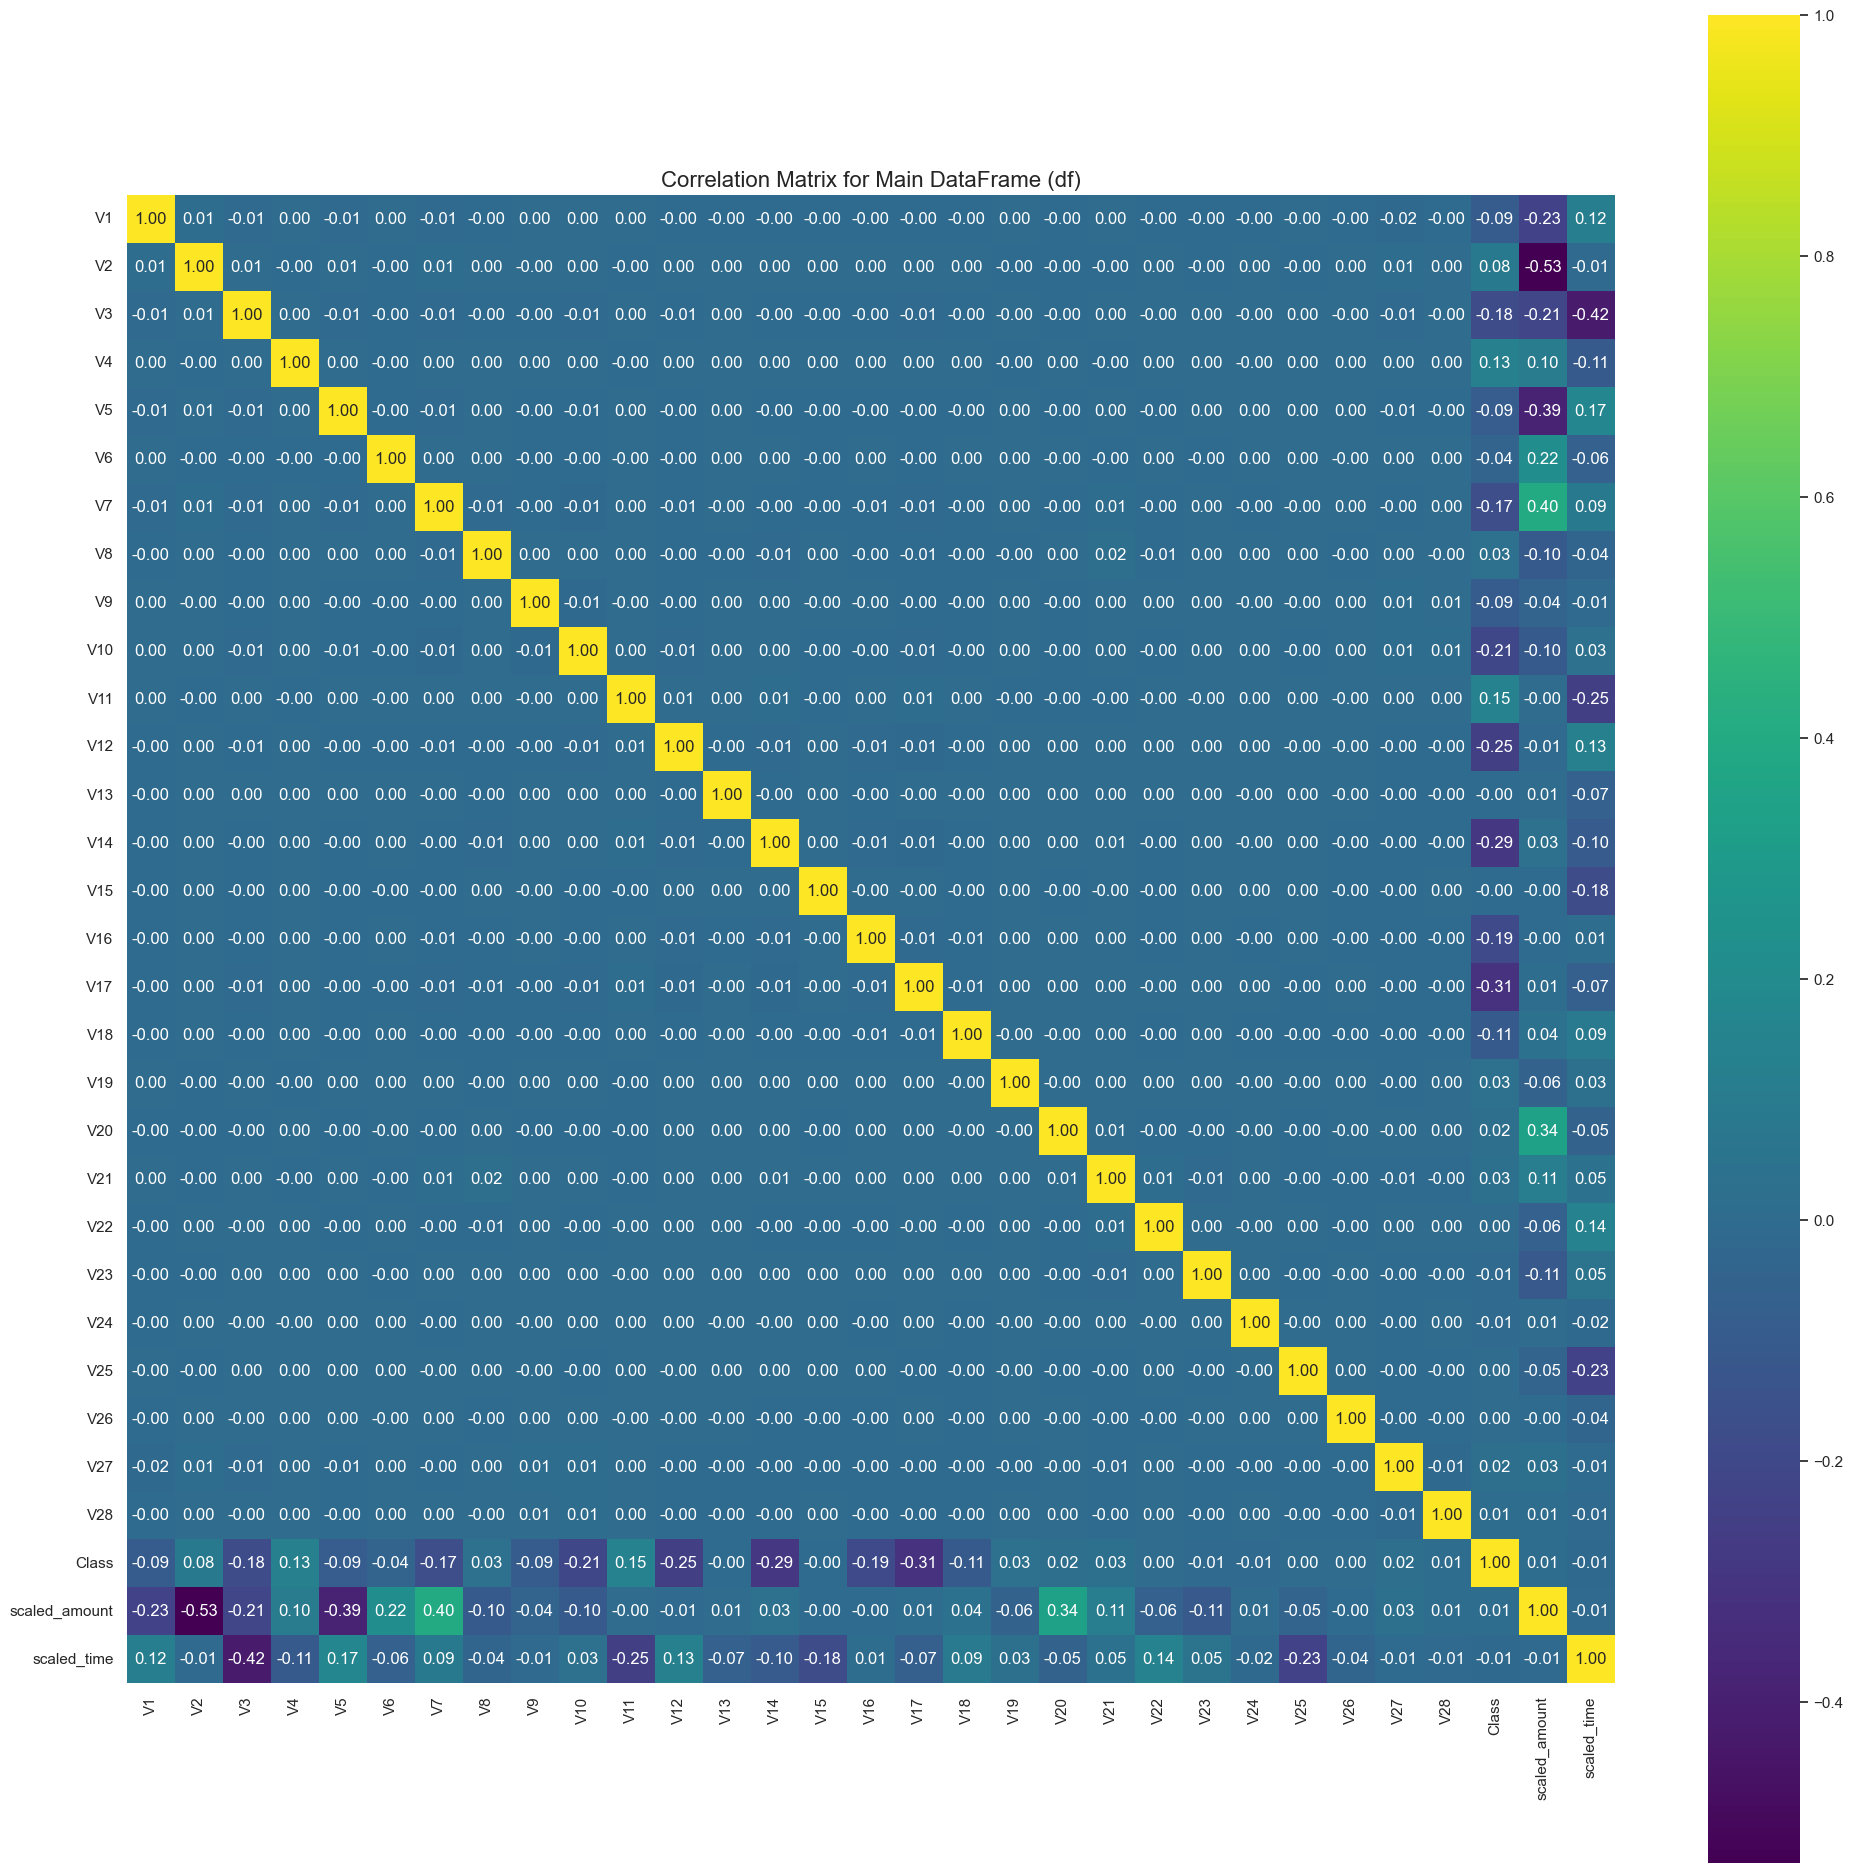

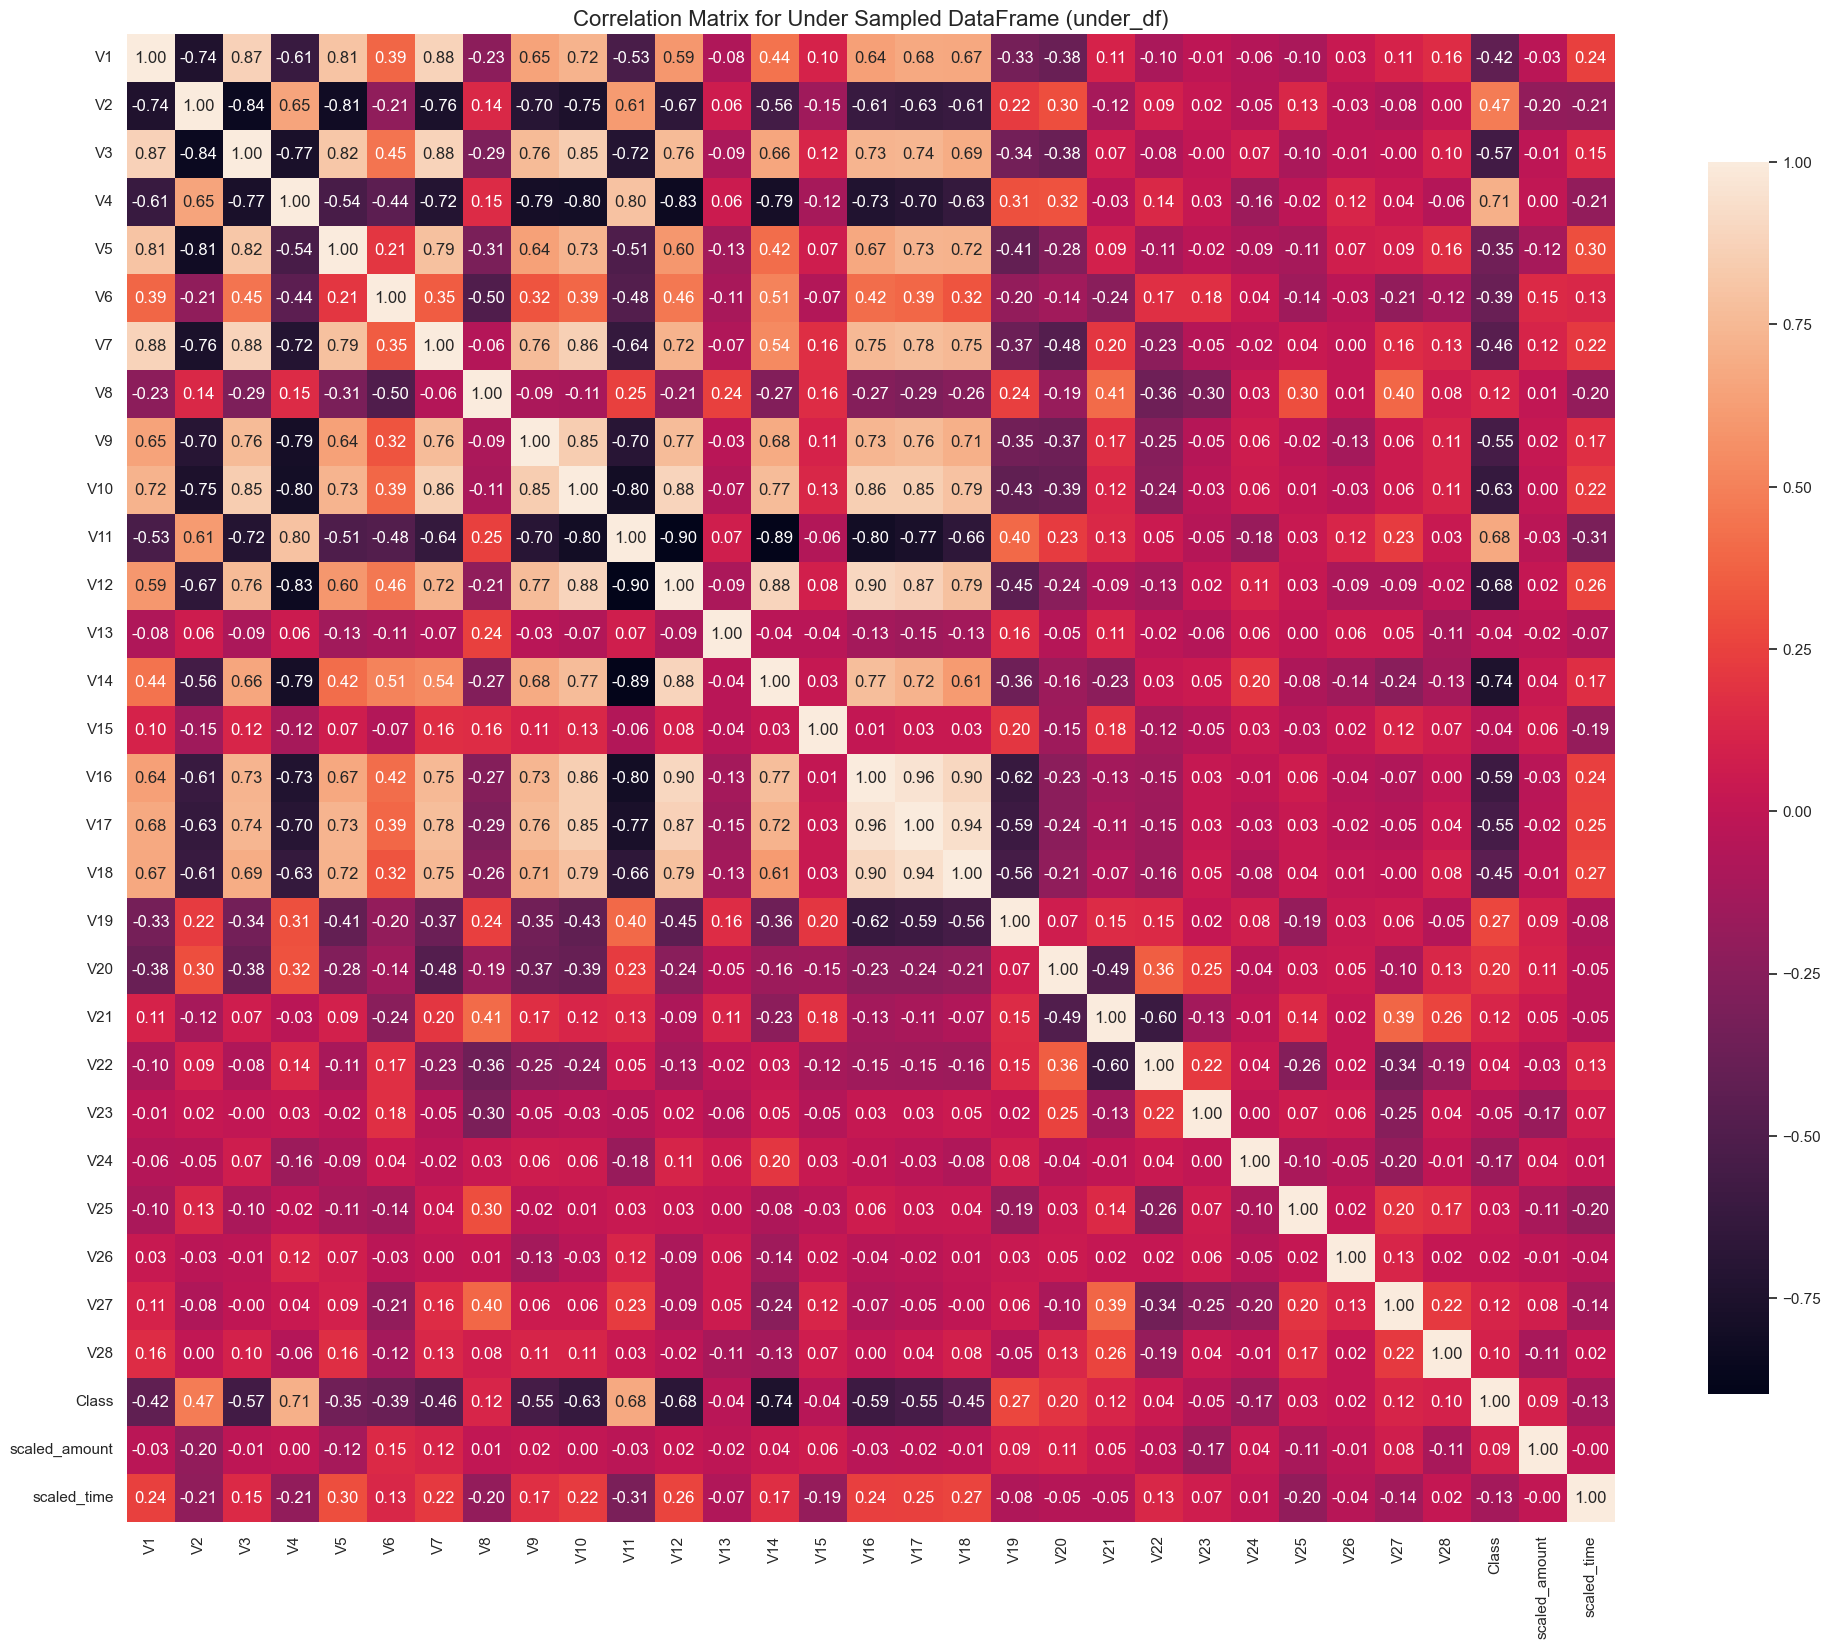

In [228]:
# Create correlation matrix for the main df
corr_df = df.corr()

# Create correlation matrix for the under_df
corr_under_df = under_df.corr()

# Set up the matplotlib figure for df correlation
plt.figure(figsize=(24, 30))
sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='viridis', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix for Main DataFrame (df)', fontsize=16)
plt.show()

# Set up the matplotlib figure for under_df correlation
plt.figure(figsize=(24, 20))
sns.heatmap(corr_under_df, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix for Under Sampled DataFrame (under_df)', fontsize=16)
plt.show()

In [230]:
pos_corr_cols=['V4','V11','V2','V19']
neg_corr_cols=['V14','V12','V10','V16','V17']

In [232]:
corr_matrix = under_df.corr()

# Select correlations of V1 to V28 with the Class column
v_columns = [f'V{i}' for i in range(1, 29)]  # List of columns V1 to V28
class_correlations = corr_matrix['Class'][v_columns]

# Sort the correlations in descending order
sorted_correlations = class_correlations.sort_values(ascending=False)

# Convert to a list
sorted_correlation_list = sorted_correlations.tolist()

# Print the sorted correlations
print(sorted_correlations)

V4     0.709828
V11    0.679458
V2     0.474013
V19    0.269506
V20    0.196193
V8     0.121963
V21    0.120362
V27    0.115326
V28    0.096610
V22    0.043665
V25    0.033712
V26    0.016153
V13   -0.037225
V15   -0.039003
V23   -0.046655
V24   -0.169851
V5    -0.354505
V6    -0.385884
V1    -0.424633
V18   -0.447320
V7    -0.461205
V17   -0.545650
V9    -0.554239
V3    -0.565267
V16   -0.587226
V10   -0.629232
V12   -0.681354
V14   -0.744406
Name: Class, dtype: float64


In [266]:
new_df.shape

(891, 31)

In [270]:
under_df.shape

(946, 31)

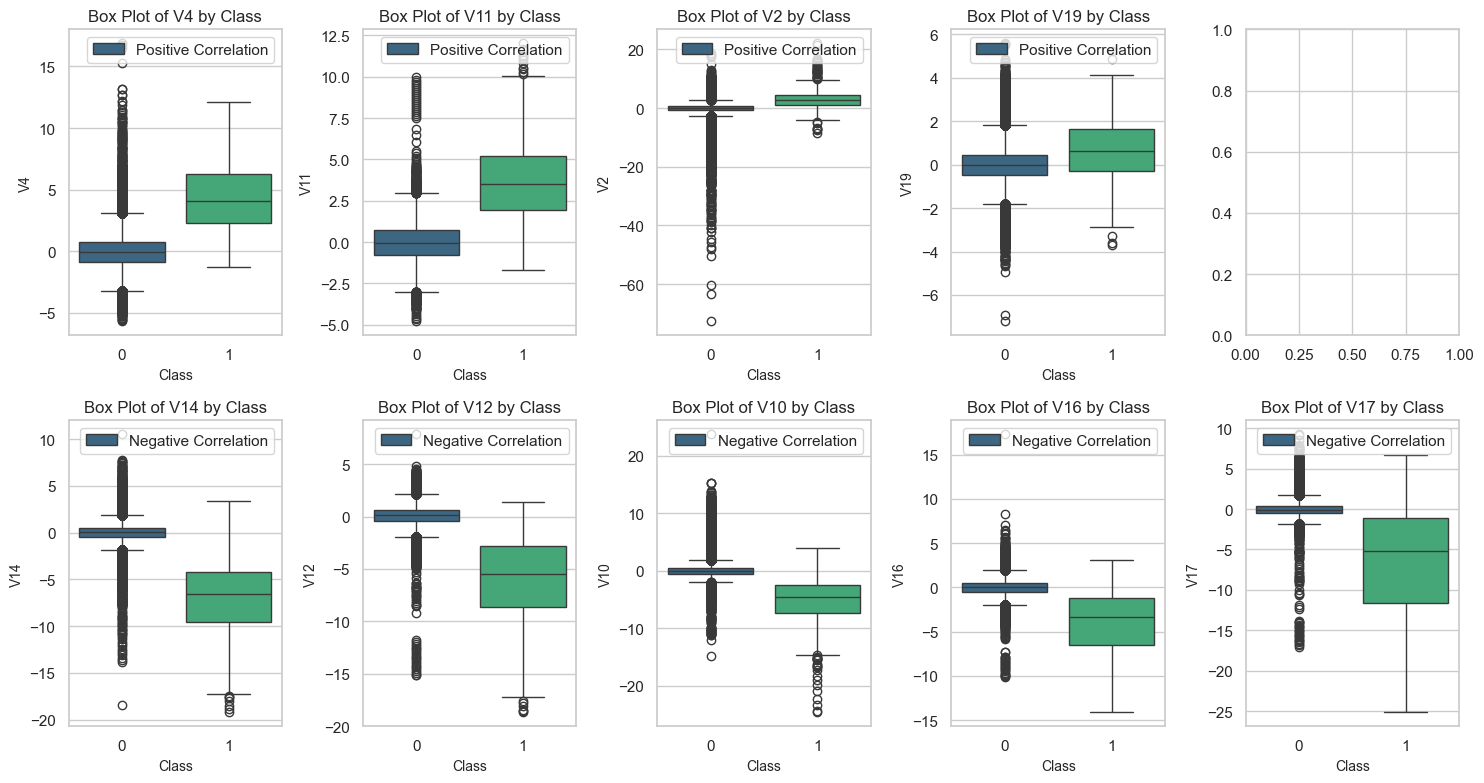

In [258]:
# Set the number of columns for subplots
num_cols = max(len(pos_corr_cols), len(neg_corr_cols))
fig, axes = plt.subplots(nrows=2, ncols=num_cols, figsize=(15, 8))

# Create box plots for positively correlated columns
for i, col in enumerate(pos_corr_cols):
    sns.boxplot(x='Class', y=col, data=df, palette='viridis', ax=axes[0, i])
    axes[0, i].set_title(f'Box Plot of {col} by Class', fontsize=12)
    axes[0, i].set_xlabel('Class', fontsize=10)
    axes[0, i].set_ylabel(col, fontsize=10)
    axes[0, i].legend(['Positive Correlation'], loc='upper right')

# Create box plots for negatively correlated columns
for i, col in enumerate(neg_corr_cols):
    sns.boxplot(x='Class', y=col, data=df, palette='viridis', ax=axes[1, i])
    axes[1, i].set_title(f'Box Plot of {col} by Class', fontsize=12)
    axes[1, i].set_xlabel('Class', fontsize=10)
    axes[1, i].set_ylabel(col, fontsize=10)
    axes[1, i].legend(['Negative Correlation'], loc='upper right')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

###  Dealing with outliers in the negative class for the most correlated features

##### This is because removing the outliers from the postive class (risk factor) be lead to loss of data important in fraud detection model later on

In [238]:
# Define the negatively correlated columns
neg_corr_cols = ['V14', 'V12', 'V10', 'V16', 'V17']

# Initialize an empty list to store the number of outliers removed for each column
outliers_count = []

for col in neg_corr_cols:
    # Get the values for fraud transactions only
    fraud_values = new_df[col].loc[new_df['Class'] == 1].values
    
    # Calculate the 25th and 75th percentiles
    q25, q75 = np.percentile(fraud_values, 25), np.percentile(fraud_values, 75)
    iqr = q75 - q25  # Calculate the interquartile range

    # Define cut-off for outliers
    cut_off = iqr * 1.5
    lower_bound, upper_bound = q25 - cut_off, q75 + cut_off
    
    # Find outliers
    outliers = [x for x in fraud_values if x < lower_bound or x > upper_bound]
    outliers_count.append((col, len(outliers)))  # Store the number of outliers for each column
    
    # Print the cut-off values and outliers information
    print(f'Column: {col}')
    print(f'Lower Bound: {lower_bound}, Upper Bound: {upper_bound}')
    print(f'Outliers for {col}: {len(outliers)}')
    print(f'Outlier values: {outliers}')
    
    # Remove outliers from the DataFrame
    new_df = new_df.drop(new_df[(new_df[col] > upper_bound) | (new_df[col] < lower_bound)].index)

# Print the total number of instances remaining after outlier removal
print(f'Number of Instances after outlier removal: {len(new_df)}')

# Optionally, print the number of outliers removed for each column
for col, count in outliers_count:
    print(f'Removed {count} outliers from column: {col}')

Column: V14
Lower Bound: -17.38415366616548, Upper Bound: 3.62654724179084
Outliers for V14: 7
Outlier values: [-17.4759212828566, -17.6206343516773, -18.4937733551053, -17.7216383537133, -19.2143254902614, -18.0499976898594, -18.8220867423816]
Column: V12
Lower Bound: -16.971245282033493, Upper Bound: 5.672071569485119
Outliers for V12: 7
Outlier values: [-18.0475965708216, -17.1504052507291, -17.003289445516, -18.5536970096458, -18.4311310279993, -17.1829184301947, -18.6837146333443]
Column: V10
Lower Bound: -13.565483550728938, Upper Bound: 4.427401646386163
Outliers for V10: 29
Outlier values: [-24.4031849699728, -16.3035376590131, -14.166794659606, -22.1870885620007, -16.6496281595399, -15.5637913387301, -18.9132433348732, -17.1415136412892, -20.9491915543611, -13.6705451263516, -14.5331616869738, -13.6081431627279, -19.836148851696, -15.2399619587112, -23.2282548357516, -16.2556117491401, -15.2318333653018, -14.1101844415457, -14.2266980575287, -14.6764702497464, -24.588262437247

In [246]:
new_df.shape

(891, 31)

In [248]:
neg_corr_cols

['V14', 'V12', 'V10', 'V16', 'V17']

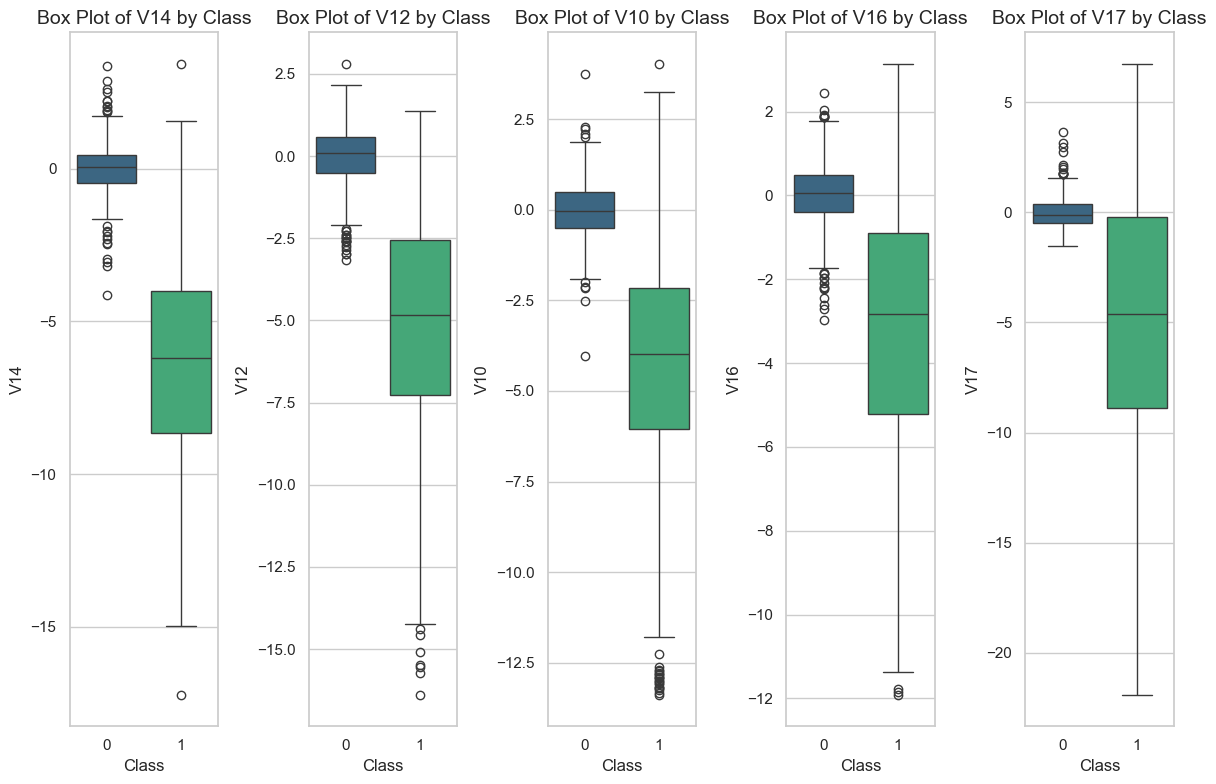

In [256]:
plt.figure(figsize=(12, 8))

# Define the number of negatively correlated columns
num_cols = len(neg_corr_cols)

# Create box plots for each negatively correlated column
for i, col in enumerate(neg_corr_cols):
    plt.subplot(1, num_cols, i + 1)  # Create a new subplot for each column
    sns.boxplot(x='Class', y=col, data=new_df, palette='viridis')
    plt.title(f'Box Plot of {col} by Class', fontsize=14)
    plt.xlabel('Class', fontsize=12)
    plt.ylabel(col, fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

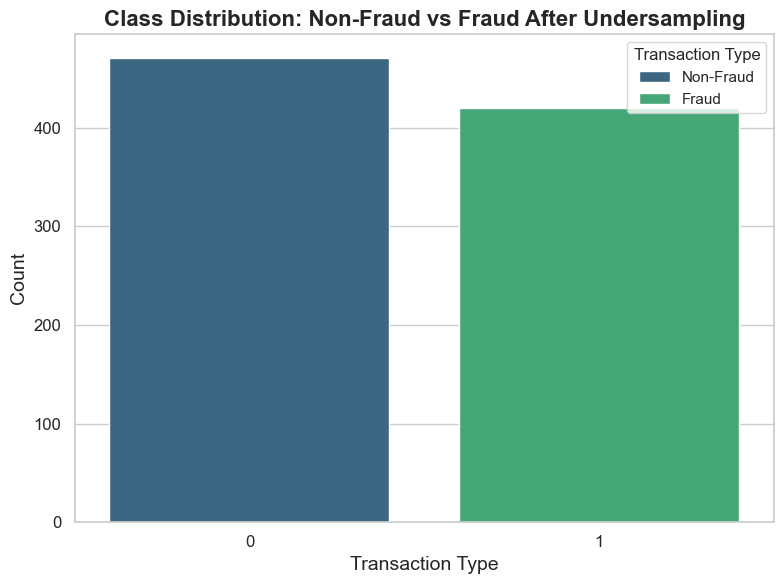

In [272]:
# Creating a barplot using the viridis palette for the 'Class' column
plt.figure(figsize=(8, 6))

# Using seaborn countplot to visualize the class distribution with the viridis palette
sns.countplot(x='Class', data=new_df, palette='viridis')

# Adding plot details for neatness
plt.title('Class Distribution: Non-Fraud vs Fraud After Undersampling', fontsize=16, weight='bold')
plt.xlabel('Transaction Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(['Non-Fraud', 'Fraud'], title='Transaction Type')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

# Predictive Models


### Using the undersampling method

In [275]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

In [290]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "RansomForestClassifier": RandomForestClassifier()
}

In [303]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np

# Define your classifiers
classifiers = {
    "LogisticRegression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

# Define parameter grids for each classifier
param_grids = {
    "LogisticRegression": {
        "penalty": ['l1', 'l2'], 
        "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    "Support Vector Classifier": {
        "C": [0.5, 0.7, 0.9, 1], 
        "kernel": ['rbf', 'poly', 'sigmoid', 'linear']
    },
    "DecisionTreeClassifier": {
        "criterion": ["gini", "entropy"], 
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10]
    }
}

# Initialize an empty dictionary to store the best estimators
best_estimators = {}

# Perform grid search for each classifier
for clf_name, clf in classifiers.items():
    print(f"Performing Grid Search for {clf_name}...")
    
    # Initialize GridSearchCV with the classifier and its parameter grid
    grid_search = GridSearchCV(clf, param_grids[clf_name], cv=5, scoring='accuracy')
    
    # Fit the model to the training data
    grid_search.fit(X_train, y_train)
    
    # Store the best estimator
    best_estimators[clf_name] = grid_search.best_estimator_
    
    # Print the best parameters
    print(f"Best parameters for {clf_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {clf_name}: {grid_search.best_score_:.2f}")
    
    # Perform cross-validation on the best estimator
    cross_val_scores = cross_val_score(best_estimators[clf_name], X_train, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation scores for {clf_name}: {cross_val_scores}")
    print(f"Mean cross-validation score for {clf_name}: {np.mean(cross_val_scores):.2f}")
    print("\n" + "-"*50 + "\n")

# Now `best_estimators` contains the best models for each classifier


Performing Grid Search for LogisticRegression...
Best parameters for LogisticRegression: {'C': 0.01, 'penalty': 'l2'}
Best cross-validation score for LogisticRegression: 0.92
Cross-validation scores for LogisticRegression: [0.96503497 0.93706294 0.95070423 0.85915493 0.9084507 ]
Mean cross-validation score for LogisticRegression: 0.92

--------------------------------------------------

Performing Grid Search for Support Vector Classifier...
Best parameters for Support Vector Classifier: {'C': 0.7, 'kernel': 'rbf'}
Best cross-validation score for Support Vector Classifier: 0.92
Cross-validation scores for Support Vector Classifier: [0.95804196 0.93706294 0.95070423 0.86619718 0.90140845]
Mean cross-validation score for Support Vector Classifier: 0.92

--------------------------------------------------

Performing Grid Search for DecisionTreeClassifier...
Best parameters for DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5}
Best cross-validation s

### Predicting Using cross validation to see the performance metrics

In [309]:
from sklearn.metrics import classification_report, confusion_matrix

# Perform cross-validation predictions
for clf_name, best_estimator in best_estimators.items():
    # Generate cross-validated predictions
    y_pred = cross_val_predict(best_estimator, X_train, y_train, cv=5)
    
    # Print classification report and confusion matrix
    print(f"Classification report for {clf_name}:")
    print(classification_report(y_train, y_pred))
    
    print(f"Confusion matrix for {clf_name}:")
    print(confusion_matrix(y_train, y_pred))
    
    print("\n" + "-"*50 + "\n")

Classification report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       388
           1       0.98      0.85      0.91       324

    accuracy                           0.92       712
   macro avg       0.93      0.92      0.92       712
weighted avg       0.93      0.92      0.92       712

Confusion matrix for LogisticRegression:
[[381   7]
 [ 47 277]]

--------------------------------------------------

Classification report for Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       388
           1       0.96      0.86      0.91       324

    accuracy                           0.92       712
   macro avg       0.93      0.92      0.92       712
weighted avg       0.93      0.92      0.92       712

Confusion matrix for Support Vector Classifier:
[[377  11]
 [ 44 280]]

--------------------------------------------------

Classi

<Figure size 800x600 with 0 Axes>

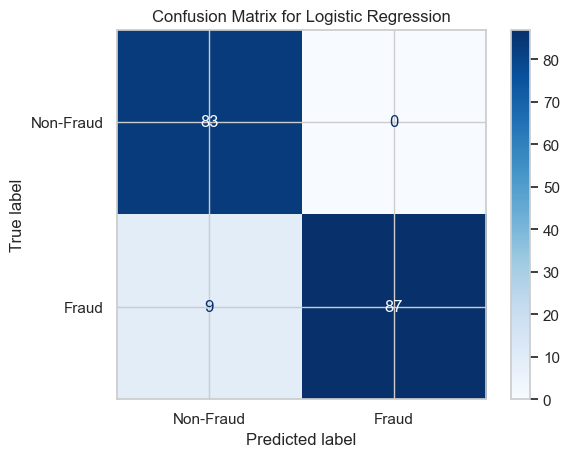

In [314]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Choose one of your classifiers to visualize (e.g., Logistic Regression)
y_pred_log_reg = best_estimators['LogisticRegression'].predict(X_test)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=["Non-Fraud", "Fraud"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

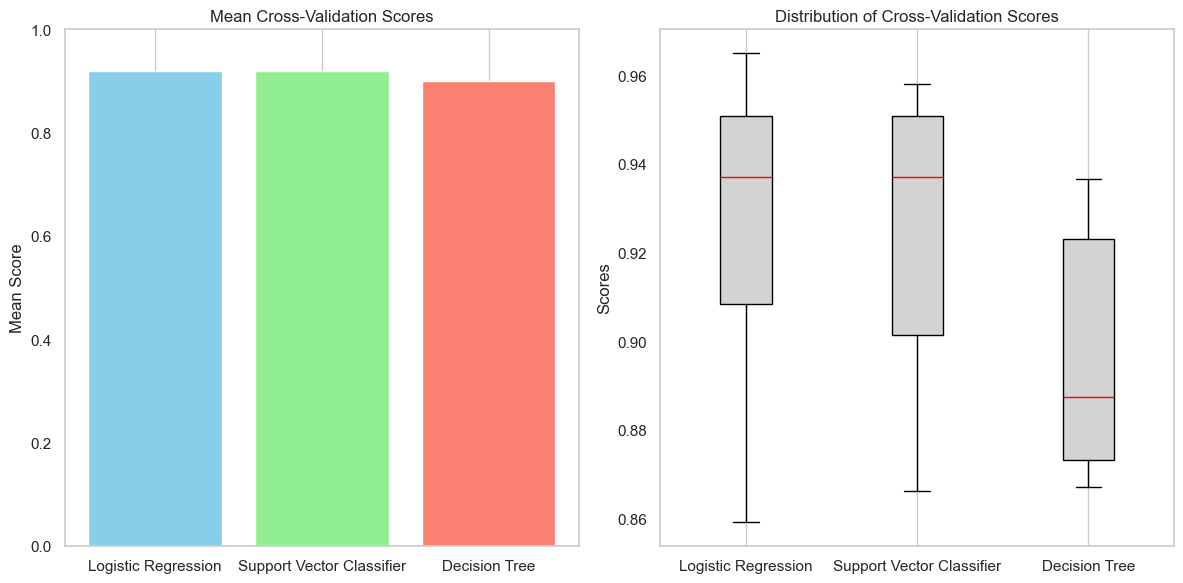

In [316]:
import matplotlib.pyplot as plt
import numpy as np

# Mean cross-validation scores
mean_scores = {
    'Logistic Regression': 0.92,
    'Support Vector Classifier': 0.92,
    'Decision Tree': 0.90
}

# Individual cross-validation scores
cv_scores = {
    'Logistic Regression': [0.96503497, 0.93706294, 0.95070423, 0.85915493, 0.9084507],
    'Support Vector Classifier': [0.95804196, 0.93706294, 0.95070423, 0.86619718, 0.90140845],
    'Decision Tree': [0.92307692, 0.86713287, 0.93661972, 0.87323944, 0.88732394]
}

# Set figure size
plt.figure(figsize=(12, 6))

# Bar plot for mean cross-validation scores
plt.subplot(1, 2, 1)
plt.bar(mean_scores.keys(), mean_scores.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.title('Mean Cross-Validation Scores')
plt.ylabel('Mean Score')
plt.grid(axis='y')

# Box plot for individual cross-validation scores
plt.subplot(1, 2, 2)
plt.boxplot(cv_scores.values(), labels=cv_scores.keys(), patch_artist=True, 
            boxprops=dict(facecolor='lightgray', color='black'),
            medianprops=dict(color='red'),)

plt.title('Distribution of Cross-Validation Scores')
plt.ylabel('Scores')
plt.grid(axis='y')

# Show the plots
plt.tight_layout()
plt.show()


##### we want to increase the recall to make sure that the most fraudulent transactions are detected

In [320]:
X_original = df.drop('Class', axis=1)
y_original = df['Class']

In [324]:
# Define the Logistic Regression model
logistic_regression = LogisticRegression(C=0.01, penalty='l2')

# Step 1: Evaluate on the original dataset using cross-validation
print("Evaluating Logistic Regression on the original dataset...")
original_scores = cross_val_score(logistic_regression, X_train_original, y_train_original, cv=5, scoring='f1')
print(f"Logistic Regression F1 Scores on original dataset: {original_scores}")
print(f"Mean F1 Score for Logistic Regression on original dataset: {original_scores.mean():.2f}")
print("\n" + "-" * 50 + "\n")

# Step 2: Evaluate on the undersampled dataset
# Assuming you have `X_train_undersampled` and `y_train_undersampled`
print("Evaluating Logistic Regression on the undersampled dataset...")
undersampled_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5, scoring='f1')
print(f"Logistic Regression F1 Scores on undersampled dataset: {undersampled_scores}")
print(f"Mean F1 Score for Logistic Regression on undersampled dataset: {undersampled_scores.mean():.2f}")

Evaluating Logistic Regression on the original dataset...
Logistic Regression F1 Scores on original dataset: [0.67692308 0.72463768 0.73381295 0.72463768 0.68217054]
Mean F1 Score for Logistic Regression on original dataset: 0.71

--------------------------------------------------

Evaluating Logistic Regression on the undersampled dataset...
Logistic Regression F1 Scores on undersampled dataset: [0.96062992 0.92561983 0.944      0.8245614  0.89256198]
Mean F1 Score for Logistic Regression on undersampled dataset: 0.91


# Conclusions

In [322]:
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original.values, y_original.values, test_size=0.2, random_state=42)

# while the undersampled dataset helped the model perform better in the short term, it also made it less effective in real-world scenarios. By using SMOTE, we could improve our model’s ability to recognize fraud in a way that’s both accurate and generalizable.

